In [34]:
import numpy as np
import matplotlib.pyplot as plt
from volatility import blackscholes as bs
from tqdm import tqdm
from typing import Union, Optional, Callable
from dataclasses import dataclass
import numpy as np
import scipy.stats as st    # type: ignore
from scipy import optimize  # type: ignore
import numpy.typing as npt
FloatArray = npt.NDArray[np.float_]
Floats = Union[float, FloatArray]

### Problem 1: Implied Volatility

The **data-1.txt** file contains the (simulated) market prices of European call options at the same point in time for the same stock, but with different strikes and exercise times. Execution times $T = \{1/12, 2/12, \dots, 6/12\}$ and strike $K = \{0.8, 0.82, \dots, 1.2\}$ are used. The initial price of the stock is $1$, and the risk-free rate is $0$.

1. Load data from a file. Calculate implied volatilities at loaded prices. 
2. Plot the expected volatilities for $t = 3/12$. Draw a smooth curve (or surface) that approximates the implied volatilities and plot the volatility curve on the same chart with the same execution time.
3. On one chart, plot implied volatility curves for all given exercise times. 
4. Plot (on a 3D chart) an implied volatility surface.

In [35]:
T, K, C = np.loadtxt("data-1.txt", skiprows=1, delimiter=",", unpack=True)

In [37]:
s = 1
r = 0
IV = bs.call_iv(s, r, C, T, K)

In [38]:
import scipy
sigma = scipy.interpolate.SmoothBivariateSpline(T, K, IV)

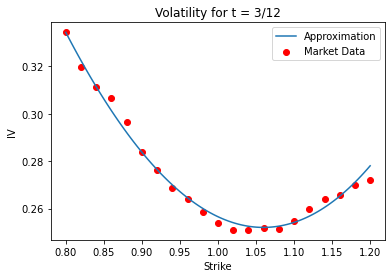

In [39]:
k = np.linspace(min(K), max(K), 100)
plt.plot(k, sigma(3/12, k, grid=False), label="Approximation")
plt.scatter(K[T == 3/12], IV[T == 3/12], label="Market Data", color="red")
plt.ylabel("IV")
plt.xlabel("Strike")
plt.title("Volatility for t = 3/12")
plt.legend()
plt.show()

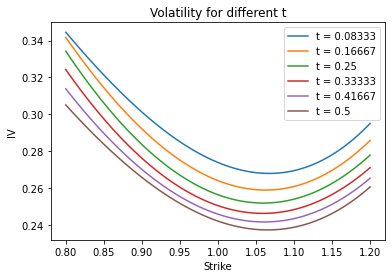

In [40]:
for t in np.unique(T):
    plt.plot(k, sigma(t, k, grid=False), label= "t = {}".format(t))

plt.ylabel("IV")
plt.xlabel("Strike")
plt.title("Volatility for different t")
plt.legend()
plt.show()